In [1]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
font = {'family' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)

In [3]:
data = pd.read_csv("Kunstgressvar.csv")

In [8]:
data['1.1'].value_counts()

Klubb/idrettslag                        167
Kommune                                  71
privat fotballhall                        1
AS                                        1
Troms Fotballkrets                        1
Fotballkrets                              1
Vitenskapelig høyskole                    1
Idrettsråd                                1
Driftsansvarlig på et større anlegg       1
Viken Idrettskrets                        1
Sortland Idretts-og Fritidspark AS        1
Name: 1.1, dtype: int64

In [4]:
kommune_df = data.loc[data["1.1"] == "Kommune"]
klubb_df = data.loc[data["1.1"] == "Klubb/idrettslag"]

### Correlation between difficulty in finding information and digital skills

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


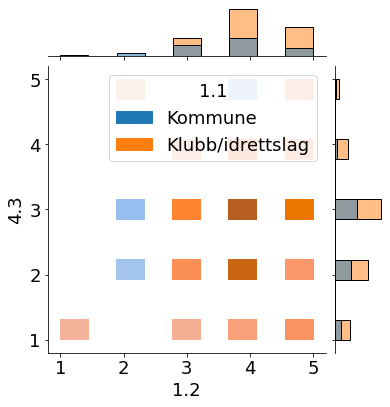

In [5]:
kom_klub_data = kommune_df.append(klubb_df)
d = kom_klub_data[["1.1", "1.2", "4.3"]].dropna().astype({"4.3": int})
sns.jointplot(data=d, x="1.2", y="4.3",hue="1.1", kind="hist")

In [6]:
d_km = kommune_df[["1.2", "4.3"]].dropna().astype({"4.3": int})
km_dig_count = d_km["1.2"].value_counts(normalize=True)
km_vansk_count = d_km["4.3"].value_counts(normalize=True)

d_kl = klubb_df[["1.2", "4.3"]].dropna().astype({"4.3": int})
kl_dig_count = d_kl["1.2"].value_counts(normalize=True)
kl_vansk_count = d_kl["4.3"].value_counts(normalize=True)

km_dig_count = km_dig_count.append(pd.Series([0], index=[1]))

In [7]:
km_dig_count.sort_index(inplace=True)
km_vansk_count.sort_index(inplace=True)
kl_dig_count.sort_index(inplace=True)
kl_vansk_count.sort_index(inplace=True)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


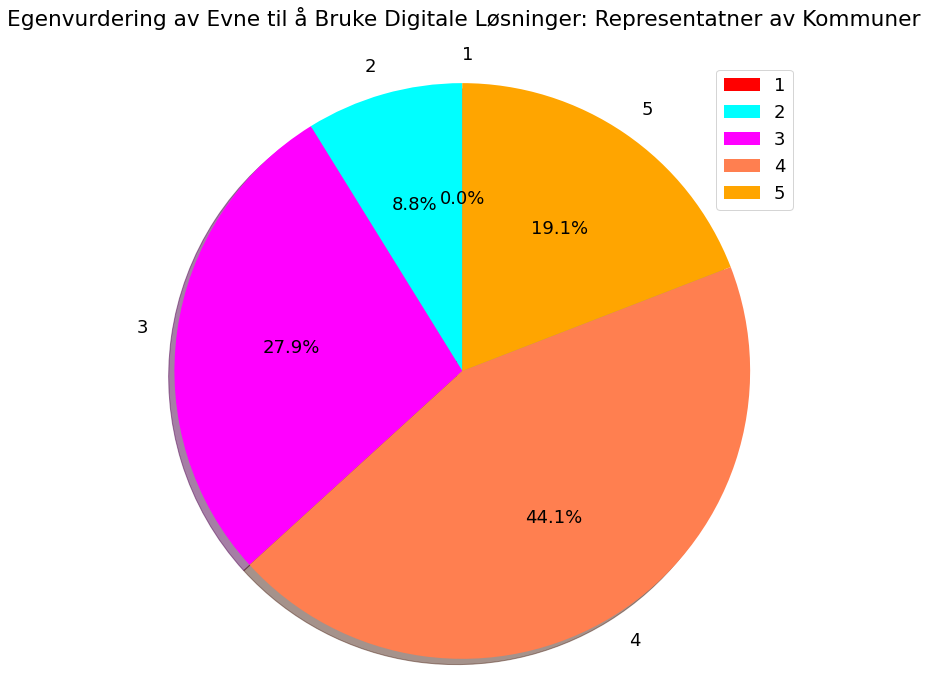

In [8]:
kmd_labels = km_dig_count.index.tolist()
kmd_sizes = km_dig_count.values.tolist()

base_colors = ['red', 'cyan', 'magenta', 'coral', "orange"]

colors = [base_colors[i-1] for i in kmd_labels]

fig, ax = plt.subplots(figsize=(10.0, 10.0))
patches, texts, _ = ax.pie(kmd_sizes, colors=colors, labels=kmd_labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax.set_title('Egenvurdering av Evne til å Bruke Digitale Løsninger: Representatner av Kommuner', pad=35)


ax.axis('equal')

plt.legend(patches, kmd_labels, loc=1)
plt.tight_layout()
# plt.title("Self-Assessment of Digital Capabilities")

plt.savefig("dig_kommune")

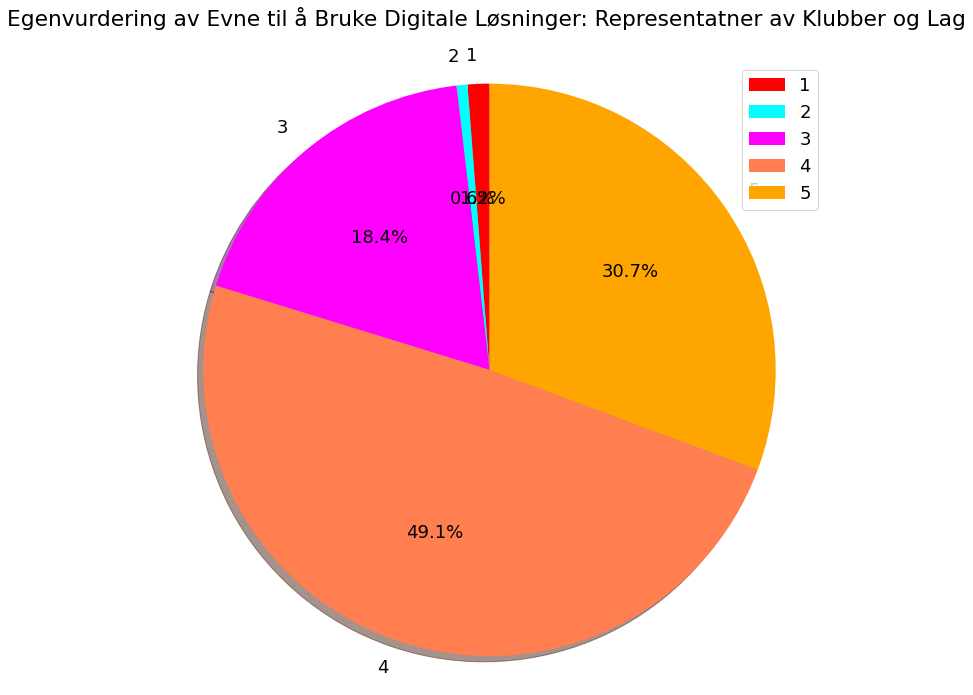

In [9]:
kld_labels = kl_dig_count.index.tolist()
kld_sizes = kl_dig_count.values.tolist()
colors = [base_colors[i-1] for i in kld_labels]

fig, ax = plt.subplots(figsize=(10.0, 10.0))
patches, texts, _ = ax.pie(kld_sizes, colors=colors, labels=kld_labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax.set_title('Egenvurdering av Evne til å Bruke Digitale Løsninger: Representatner av Klubber og Lag', pad=35)


ax.axis('equal')

plt.legend(patches, kld_labels, loc=1)
plt.tight_layout()

plt.savefig("dig_klubb")

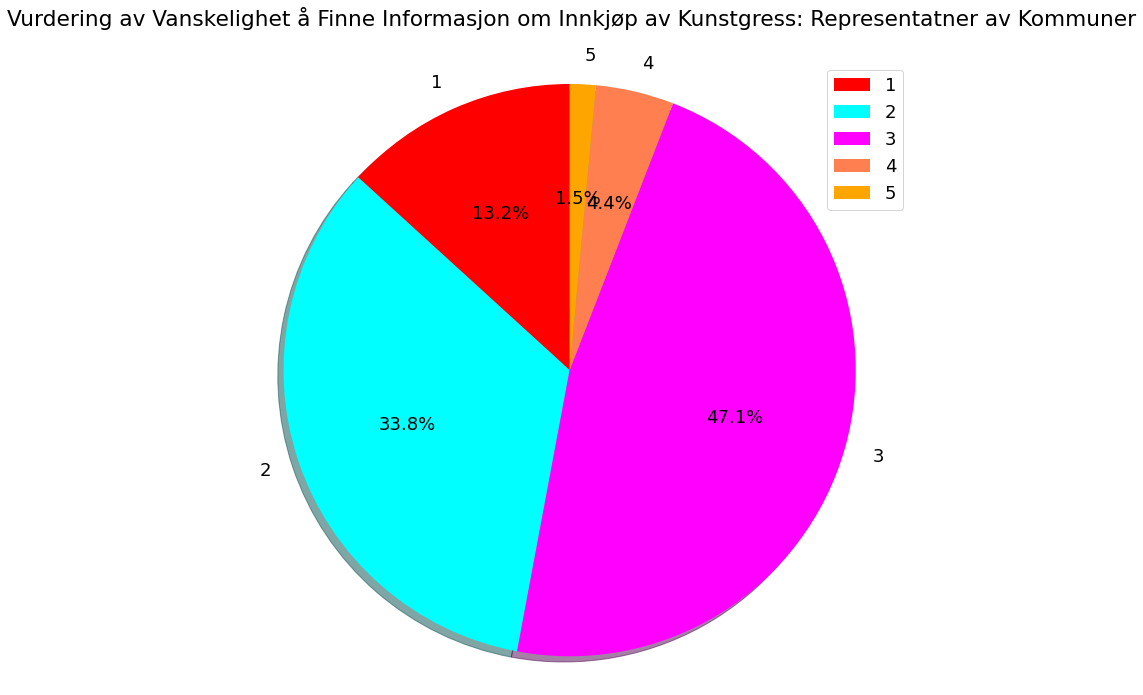

In [10]:
kmv_labels = km_vansk_count.index.tolist()
kmv_sizes = km_vansk_count.values.tolist()

colors = [base_colors[i-1] for i in kmv_labels]

fig, ax = plt.subplots(figsize=(10.0, 10.0))
patches, texts, _ = ax.pie(kmv_sizes, colors=colors, labels=kmv_labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax.set_title('Vurdering av Vanskelighet å Finne Informasjon om Innkjøp av Kunstgress: Representatner av Kommuner', pad=35)


ax.axis('equal')

plt.legend(patches, kmv_labels, loc=1)
plt.tight_layout()

plt.savefig("vansk_innkjøp_kommune")

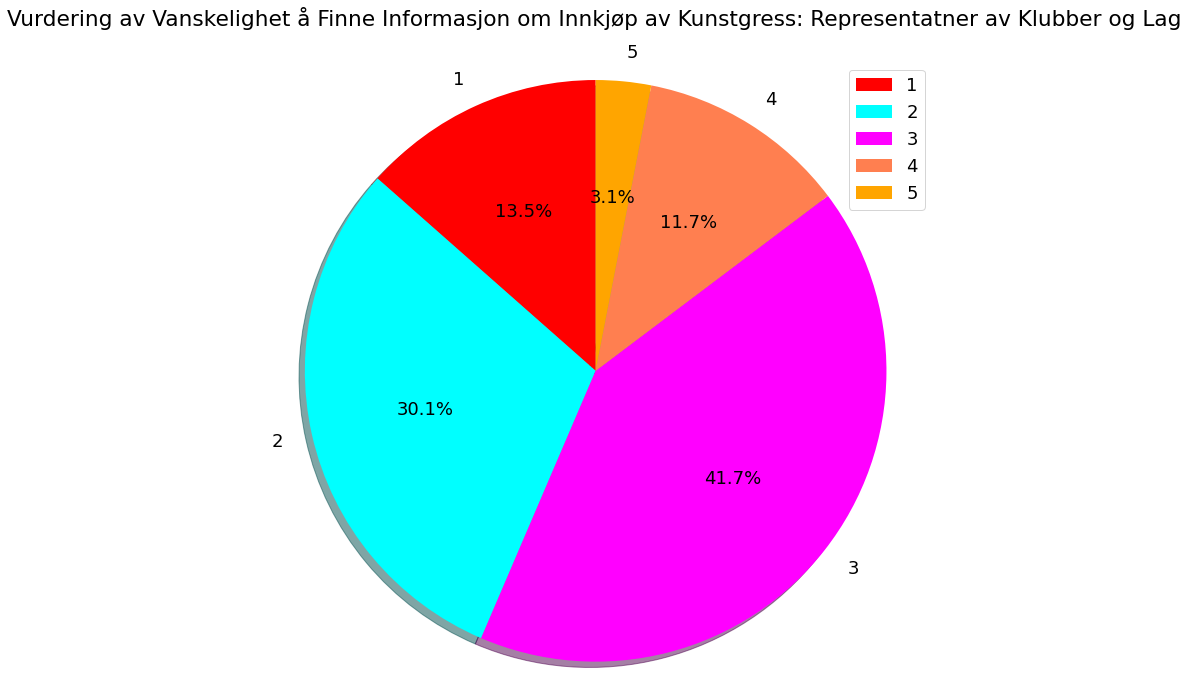

In [11]:
klv_labels = kl_vansk_count.index.tolist()
klv_sizes = kl_vansk_count.values.tolist()

colors = [base_colors[i-1] for i in klv_labels]

fig, ax = plt.subplots(figsize=(10.0, 10.0))
patches, texts, _ = ax.pie(klv_sizes, colors=colors, labels=klv_labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax.set_title('Vurdering av Vanskelighet å Finne Informasjon om Innkjøp av Kunstgress: Representatner av Klubber og Lag', pad=35)


ax.axis('equal')

plt.legend(patches, klv_labels, loc=1)
plt.tight_layout()

plt.savefig("vansk_innkjøp_klubb")

In [12]:
d_km = kommune_df[["1.2", "4.3"]].dropna().astype({"4.3": int})
km_dig_count = d_km["1.2"].value_counts(normalize=True)
km_vansk_count = d_km["4.3"].value_counts(normalize=True)

d_kl = klubb_df[["1.2", "4.3"]].dropna().astype({"4.3": int})
kl_dig_count = d_kl["1.2"].value_counts(normalize=True)
kl_vansk_count = d_kl["4.3"].value_counts(normalize=True)

kl_vansk_avh_count = klubb_df["4.6"].dropna().astype(int).value_counts(normalize=True)

In [13]:
kl_vansk_avh_count = klubb_df["4.6"].dropna().astype(int).value_counts(normalize=True).rename("klubb")
kl_vansk_avh_count.sort_index(inplace=True)

km_vansk_avh_count = kommune_df["4.6"].dropna().astype(int).value_counts(normalize=True).rename("kommune")
km_vansk_avh_count.sort_index(inplace=True)

x = pd.concat([kl_vansk_avh_count, km_vansk_avh_count], axis=1)

## Avhending Vanskelighet

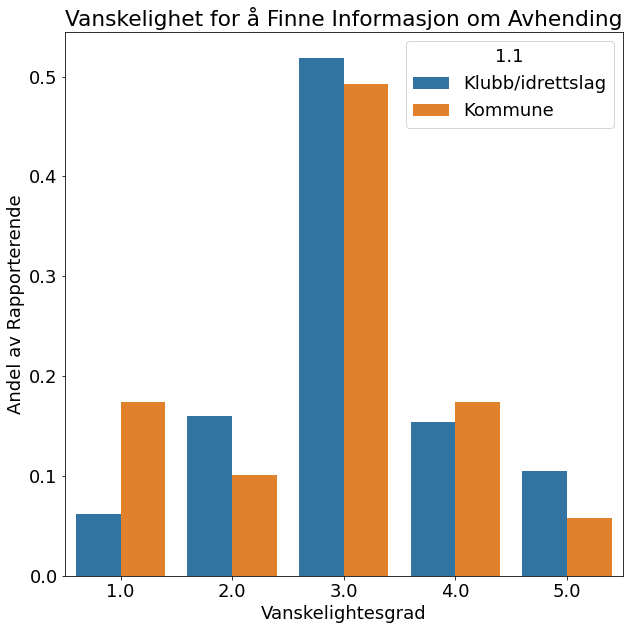

In [14]:
kommune_df = data.loc[data["1.1"] == "Kommune"]
klubb_df = data.loc[data["1.1"] == "Klubb/idrettslag"]

df = kommune_df.append(klubb_df)

x, y, hue = "4.6", "prop", "1.1"
hue_order = ["kommune", "klubb"]

f, ax = plt.subplots(figsize=(10.0, 10.0))

prop_df = (df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df, ax=ax).set(xlabel='Vanskelightesgrad', ylabel='Andel av Rapporterende')
plt.title("Vanskelighet for å Finne Informasjon om Avhending")
plt.savefig("barplot_vansk_avhending")

## 2.4

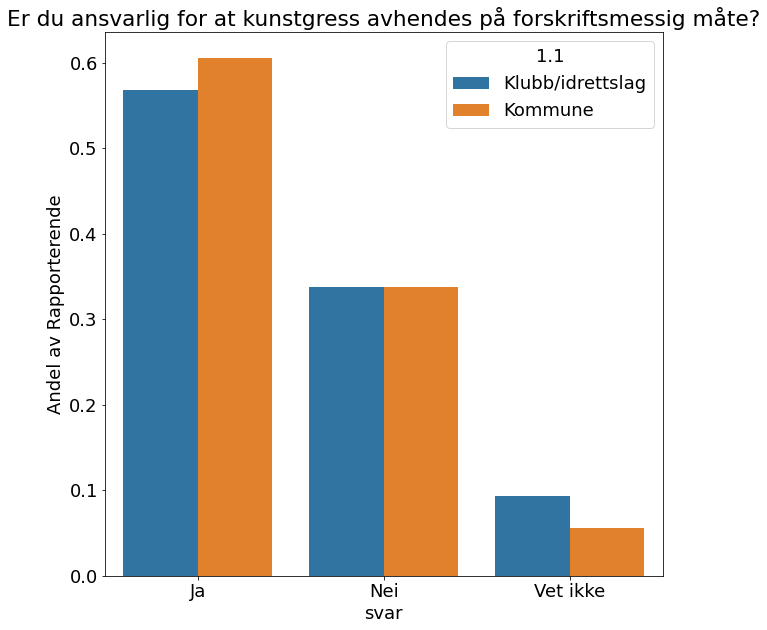

In [15]:
kommune_df = data.loc[data["1.1"] == "Kommune"]
klubb_df = data.loc[data["1.1"] == "Klubb/idrettslag"]

df = kommune_df.append(klubb_df)

x, y, hue = "2.4", "prop", "1.1"
hue_order = ["kommune", "klubb"]

f, ax = plt.subplots(figsize=(10.0, 10.0))

prop_df = (df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df, ax=ax).set(xlabel='svar', ylabel='Andel av Rapporterende')
plt.title("Er du ansvarlig for at kunstgress avhendes på forskriftsmessig måte?")
plt.savefig("barplot_ansvar_kunnskap")

## 3.1 ift 1.1

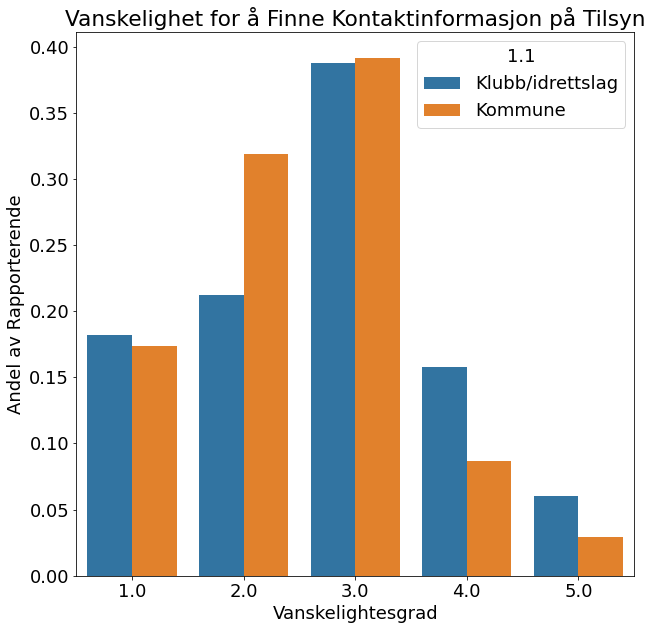

In [16]:
kommune_df = data.loc[data["1.1"] == "Kommune"]
klubb_df = data.loc[data["1.1"] == "Klubb/idrettslag"]

df = kommune_df.append(klubb_df)

x, y, hue = "3.1", "prop", "1.1"
hue_order = ["kommune", "klubb"]

f, ax = plt.subplots(figsize=(10.0, 10.0))

prop_df = (df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df, ax=ax).set(xlabel='Vanskelightesgrad', ylabel='Andel av Rapporterende')
plt.title("Vanskelighet for å Finne Kontaktinformasjon på Tilsyn")
plt.savefig("barplot_kontaktinfo_tilsyn")

## 3.2 ift 1.1

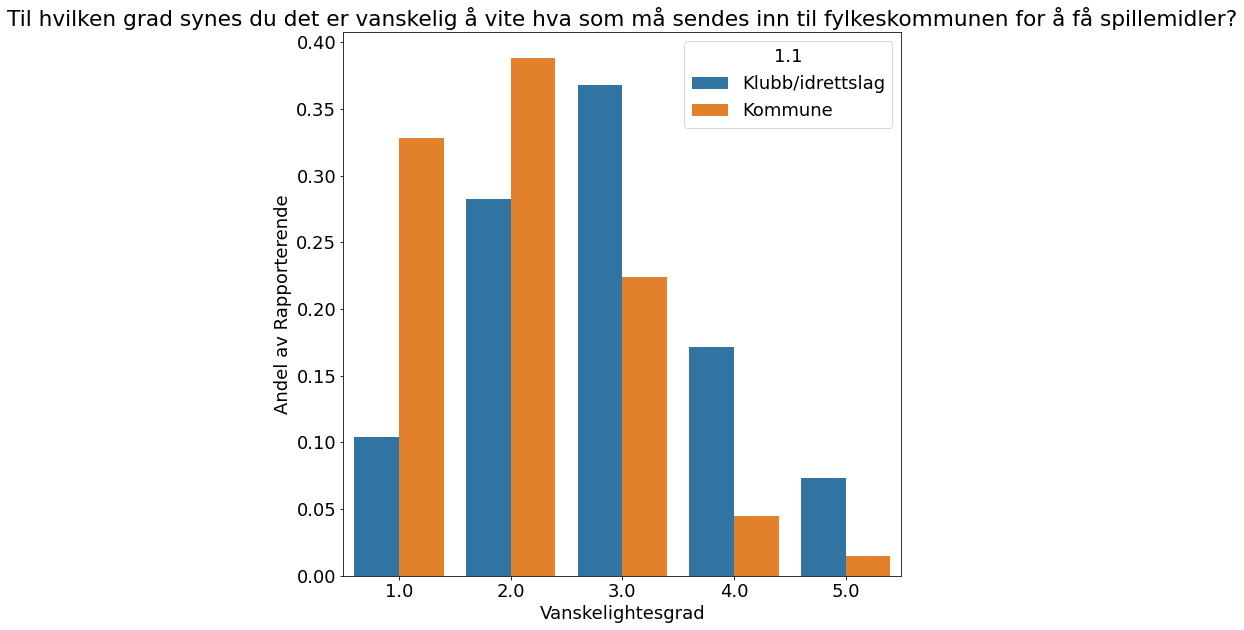

In [17]:
kommune_df = data.loc[data["1.1"] == "Kommune"]
klubb_df = data.loc[data["1.1"] == "Klubb/idrettslag"]

df = kommune_df.append(klubb_df)

x, y, hue = "3.2", "prop", "1.1"
hue_order = ["kommune", "klubb"]

f, ax = plt.subplots(figsize=(10.0, 10.0))

prop_df = (df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df, ax=ax).set(xlabel='Vanskelightesgrad', ylabel='Andel av Rapporterende')
plt.title("Til hvilken grad synes du det er vanskelig å vite hva som må sendes inn til fylkeskommunen for å få spillemidler?")
plt.savefig("barplot_spillemiddelinfo")

## 2.2 ift 1.1

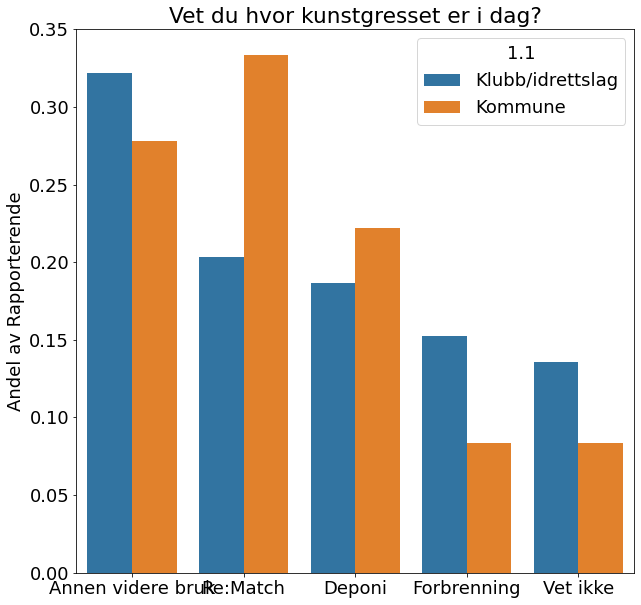

In [18]:
kommune_df = data.loc[data["1.1"] == "Kommune"]
klubb_df = data.loc[data["1.1"] == "Klubb/idrettslag"]

df = kommune_df.append(klubb_df)

d1 = df.loc[data["2.2"] == "Deponi"]
d2 = df.loc[data["2.2"] == "Forbrenning"]
d3 = df.loc[data["2.2"] == "Re:Match"]
d4 = df.loc[data["2.2"] == "Annen videre bruk"]
d5 = df.loc[data["2.2"] == "Vet ikke"]

df = d1.append(d2).append(d3).append(d4).append(d5)



x, y, hue = "2.2", "prop", "1.1"
hue_order = ["kommune", "klubb"]

f, ax = plt.subplots(figsize=(10.0, 10.0))

prop_df = (df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df, ax=ax).set(xlabel='', ylabel='Andel av Rapporterende')
plt.title("Vet du hvor kunstgresset er i dag?")
plt.savefig("barplot_hvor_er_nå")

## 3.3 ift 1.1

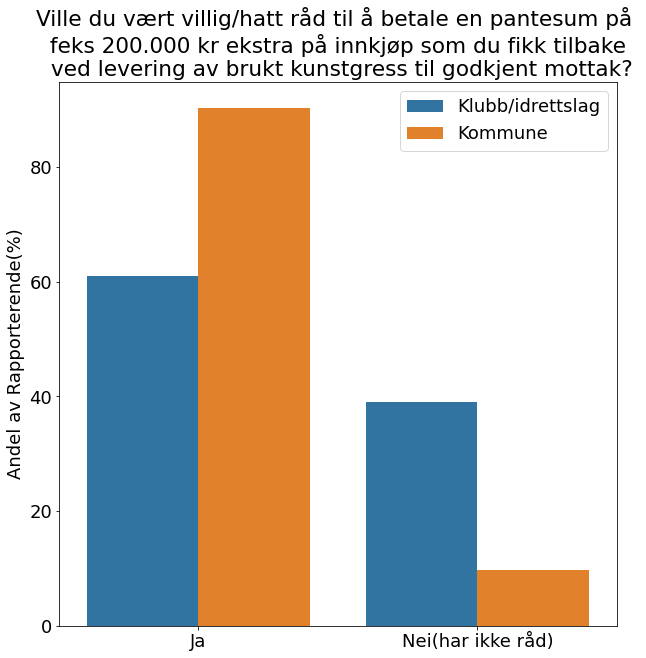

In [19]:
kommune_df = data.loc[data["1.1"] == "Kommune"]
klubb_df = data.loc[data["1.1"] == "Klubb/idrettslag"]

df = kommune_df.append(klubb_df)

d1 = df.loc[data["3.3"] == "Ja"]
d2 = df.loc[data["3.3"] == "Nei(har ikke råd)"]

df = d1.append(d2)



x, y, hue = "3.3", "prop", "1.1"
hue_order = ["kommune", "klubb"]

f, ax = plt.subplots(figsize=(10.0, 10.0))

prop_df = (df[x]
 .groupby(df[hue])
 .value_counts(normalize=True).mul(100)
 .rename(y)
 .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df, ax=ax).set(xlabel='', ylabel='Andel av Rapporterende(%)')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[:], labels=labels, loc="upper right")

plt.title("Ville du vært villig/hatt råd til å betale en pantesum på \n feks 200.000 kr ekstra på innkjøp som du fikk tilbake \n ved levering av brukt kunstgress til godkjent mottak?")
plt.savefig("barplot_pant")

## 2.3 ift 1.1

<ipython-input-20-f46eb68662d7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2['2.3'] = d2['2.3'].replace(['Ja, Så lenge det er økonomisk forsvarlig'],'Så lenge det er økonomisk forsvarlig')


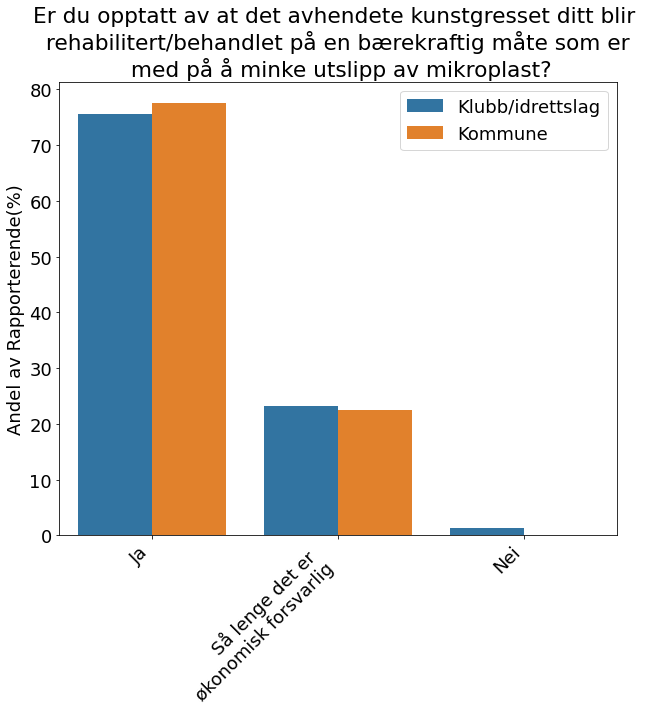

In [20]:


kommune_df = data.loc[data["1.1"] == "Kommune"]
klubb_df = data.loc[data["1.1"] == "Klubb/idrettslag"]

df = kommune_df.append(klubb_df)

d1 = df.loc[data["2.3"] == "Ja"]

d2 = df.loc[data["2.3"] == "Ja, Så lenge det er økonomisk forsvarlig"]
d3 = df.loc[data["2.3"] == "Så lenge det er økonomisk forsvarlig"]
d2['2.3'] = d2['2.3'].replace(['Ja, Så lenge det er økonomisk forsvarlig'],'Så lenge det er økonomisk forsvarlig')

d5 = df.loc[data["2.3"] == "Nei"]

df = d1.append(d2).append(d3).append(d5)
df['2.3'] = df['2.3'].replace(['Så lenge det er økonomisk forsvarlig'],'Så lenge det er \n økonomisk forsvarlig')

x, y, hue = "2.3", "prop", "1.1"
hue_order = ["kommune", "klubb"]

f, ax = plt.subplots(figsize=(10.0, 10.0))

prop_df = ((df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)).mul(100)
 .rename(y)
 .reset_index())


sns.barplot(x=x, y=y, hue=hue, data=prop_df, ax=ax).set(xlabel='', ylabel='Andel av Rapporterende(%)')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[:], labels=labels, loc="upper right")

plt.gcf().subplots_adjust(bottom=0.25)
plt.title("Er du opptatt av at det avhendete kunstgresset ditt blir \n rehabilitert/behandlet på en bærekraftig måte som er \n med på å minke utslipp av mikroplast?")
plt.savefig("barplot_miljø")

In [21]:
d2['2.3'] = d2['2.3'].replace(['Ja, Så lenge det er økonomisk forsvarlig'],'Så lenge det er økonomisk forsvarlig')

## 4.8 ift 1.1

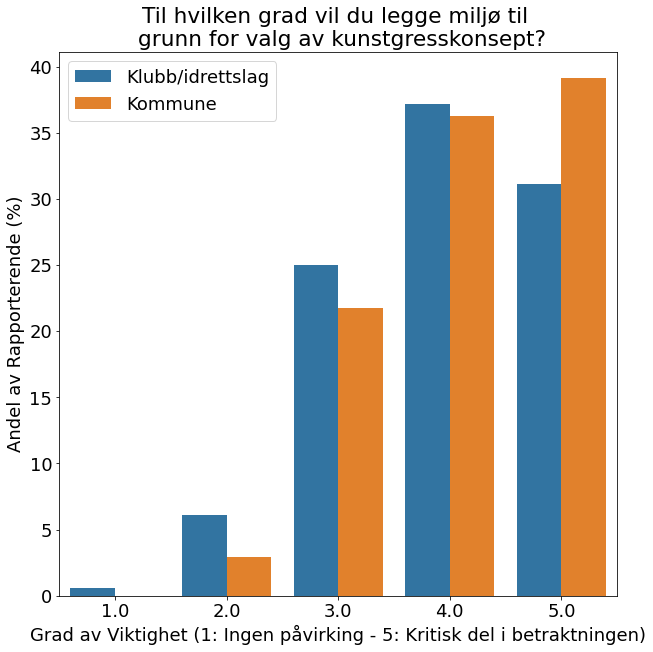

In [22]:
kommune_df = data.loc[data["1.1"] == "Kommune"]
klubb_df = data.loc[data["1.1"] == "Klubb/idrettslag"]

df = kommune_df.append(klubb_df)

x, y, hue = "4.8", "prop", "1.1"
hue_order = ["kommune", "klubb"]

f, ax = plt.subplots(figsize=(10.0, 10.0))

prop_df = (df[x]
 .groupby(df[hue])
 .value_counts(normalize=True).mul(100)
 .rename(y)
 .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df, ax=ax).set(xlabel='Grad av Viktighet (1: Ingen påvirking - 5: Kritisk del i betraktningen)', ylabel='Andel av Rapporterende (%)')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[:], labels=labels, loc="upper left")

plt.title("Til hvilken grad vil du legge miljø til \n grunn for valg av kunstgresskonsept?")
plt.savefig("barplot_miljø_valg_kunstgresskonsept")

In [23]:
df[x].groupby(df[hue]).value_counts(normalize=True)["Kommune"]

4.8
5.0    0.391304
4.0    0.362319
3.0    0.217391
2.0    0.028986
Name: 4.8, dtype: float64

### 4.8 Gjennomsnitt
Klubb/idrettslag: 3.920734
Kommune: 4.115941

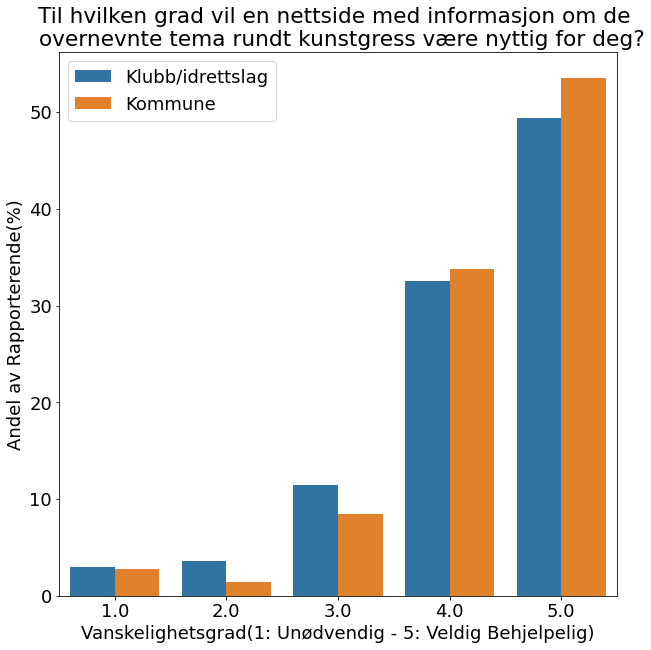

In [24]:
kommune_df = data.loc[data["1.1"] == "Kommune"]
klubb_df = data.loc[data["1.1"] == "Klubb/idrettslag"]

df = kommune_df.append(klubb_df)


x, y, hue = "5.4", "prop", "1.1"
hue_order = ["kommune", "klubb"]

f, ax = plt.subplots(figsize=(10.0, 10.0))

prop_df = (df[x]
 .groupby(df[hue])
 .value_counts(normalize=True).mul(100)
 .rename(y)
 .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df, ax=ax).set(xlabel='Vanskelighetsgrad(1: Unødvendig - 5: Veldig Behjelpelig)', ylabel='Andel av Rapporterende(%)')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[:], labels=labels, loc="upper left")

plt.title("Til hvilken grad vil en nettside med informasjon om de \n overnevnte tema rundt kunstgress være nyttig for deg?")
plt.savefig("barplot_nyttighet_nettside")

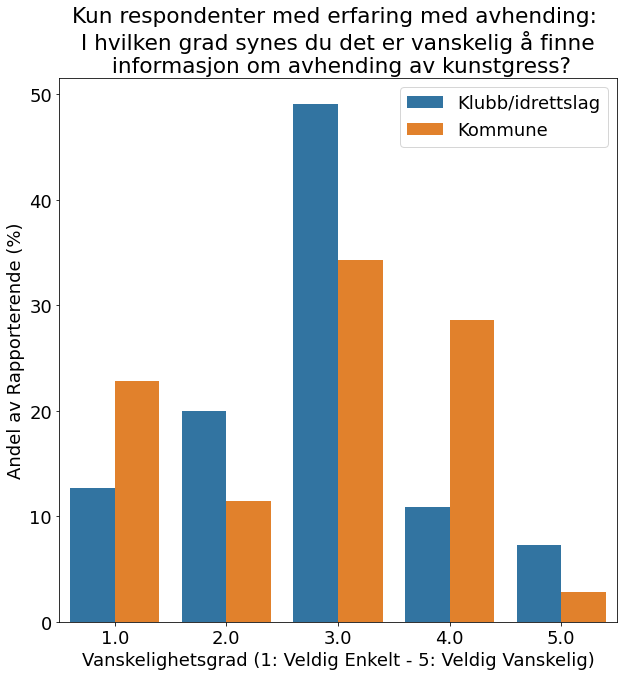

In [25]:
kommune_df = data.loc[data["1.1"] == "Kommune"]
klubb_df = data.loc[data["1.1"] == "Klubb/idrettslag"]

df = kommune_df.append(klubb_df)

df = df.loc[df["2.1"] == "Ja"]


x, y, hue = "4.6", "prop", "1.1"
hue_order = ["kommune", "klubb"]

f, ax = plt.subplots(figsize=(10.0, 10.0))

prop_df = (df[x]
 .groupby(df[hue])
 .value_counts(normalize=True).mul(100)
 .rename(y)
 .reset_index())


sns.barplot(x=x, y=y, hue=hue, data=prop_df, ax=ax).set(xlabel='Vanskelighetsgrad (1: Veldig Enkelt - 5: Veldig Vanskelig)', ylabel='Andel av Rapporterende (%)')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[:], labels=labels, loc="upper right")

plt.title("Kun respondenter med erfaring med avhending: \n I hvilken grad synes du det er vanskelig å finne \n informasjon om avhending av kunstgress?")
plt.savefig("barplot_vansk_avhending_filtrert")

In [26]:
df = kommune_df.append(klubb_df)
pdf = df.loc[df["2.1"] == "Ja"]

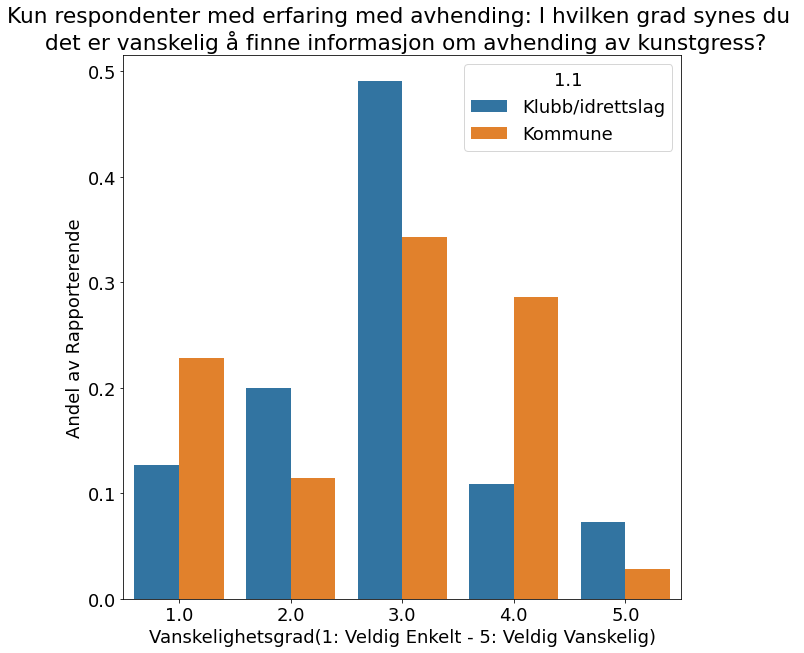

In [27]:
kommune_df = data.loc[data["1.1"] == "Kommune"]
klubb_df = data.loc[data["1.1"] == "Klubb/idrettslag"]

df = kommune_df.append(klubb_df)

df = df.loc[df["2.1"] == "Ja"]


x, y, hue = "4.6", "prop", "1.1"
hue_order = ["kommune", "klubb"]

f, ax = plt.subplots(figsize=(10.0, 10.0))

prop_df = (df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index())


sns.barplot(x=x, y=y, hue=hue, data=prop_df, ax=ax).set(xlabel='Vanskelighetsgrad(1: Veldig Enkelt - 5: Veldig Vanskelig)', ylabel='Andel av Rapporterende')
plt.title("Kun respondenter med erfaring med avhending: I hvilken grad synes du \n det er vanskelig å finne informasjon om avhending av kunstgress?")
plt.savefig("barplot_vansk_avhending_filtrert")

In [28]:
prop_df

,1.1,4.6,prop
0,Klubb/idrettslag,3.0,0.490909
1,Klubb/idrettslag,2.0,0.200000
2,Klubb/idrettslag,1.0,0.127273
3,Klubb/idrettslag,4.0,0.109091
4,Klubb/idrettslag,5.0,0.072727
5,Kommune,3.0,0.342857
6,Kommune,4.0,0.285714
7,Kommune,1.0,0.228571
8,Kommune,2.0,0.114286
9,Kommune,5.0,0.028571


# 4.5

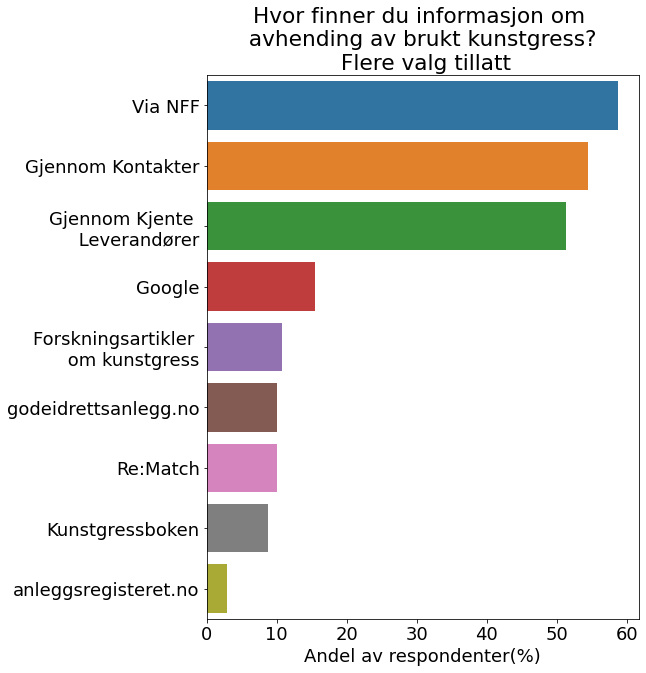

In [29]:
ddd = pd.DataFrame({"index": ["Via NFF", "Gjennom Kontakter", "Gjennom Kjente Leverandører", "Google", "Forskningsartikler om kunstgress", "godeidrettsanlegg.no", "Re:Match", "Kunstgressboken", "anleggsregisteret.no"],
             "prop": [58.8, 54.5,51.3, 15.5, 10.8, 10.1, 10.1, 8.7,2.9]})

x, y = "index", "prop"

ddd['index'] = ddd['index'].replace(['Forskningsartikler om kunstgress'],'Forskningsartikler \n om kunstgress')
ddd['index'] = ddd['index'].replace(['Gjennom Kjente Leverandører'],'Gjennom Kjente \n Leverandører')

f, ax = plt.subplots(figsize=(10.0, 10.0))
sns.barplot(x=y, y=x, data=ddd, ax=ax, orient="h").set(xlabel='Andel av respondenter(%)', ylabel='')

plt.gcf().subplots_adjust(left=0.30)
plt.title("Hvor finner du informasjon om \n avhending av brukt kunstgress? \n Flere valg tillatt")
plt.savefig("barplot_info_kilde")

In [30]:
data["Tidsmerke"].unique()

array(['05.03.2021 kl. 11.25.35', '05.03.2021 kl. 11.27.05',
       '05.03.2021 kl. 11.27.23', '05.03.2021 kl. 11.30.03',
       '05.03.2021 kl. 11.33.10', '05.03.2021 kl. 11.34.33',
       '05.03.2021 kl. 11.36.10', '05.03.2021 kl. 11.37.30',
       '05.03.2021 kl. 11.37.43', '05.03.2021 kl. 11.40.50',
       '05.03.2021 kl. 11.41.19', '05.03.2021 kl. 11.42.09',
       '05.03.2021 kl. 11.42.43', '05.03.2021 kl. 11.44.06',
       '05.03.2021 kl. 11.44.43', '05.03.2021 kl. 11.48.42',
       '05.03.2021 kl. 11.49.01', '05.03.2021 kl. 11.49.43',
       '05.03.2021 kl. 11.50.16', '05.03.2021 kl. 11.53.03',
       '05.03.2021 kl. 11.53.26', '05.03.2021 kl. 11.53.43',
       '05.03.2021 kl. 11.53.52', '05.03.2021 kl. 11.54.05',
       '05.03.2021 kl. 11.54.58', '05.03.2021 kl. 11.55.34',
       '05.03.2021 kl. 11.55.50', '05.03.2021 kl. 11.56.14',
       '05.03.2021 kl. 11.56.31', '05.03.2021 kl. 11.56.54',
       '05.03.2021 kl. 11.56.58', '05.03.2021 kl. 11.57.20',
       '05.03.2021 kl. 1

In [31]:
data["Tidsmerke"].count()

248

# 5.1

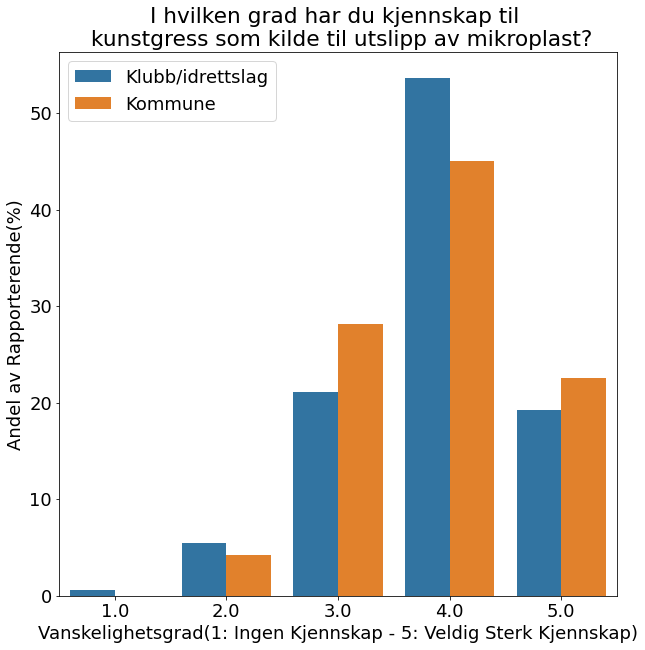

In [32]:
kommune_df = data.loc[data["1.1"] == "Kommune"]
klubb_df = data.loc[data["1.1"] == "Klubb/idrettslag"]

df = kommune_df.append(klubb_df)


x, y, hue = "5.1", "prop", "1.1"
hue_order = ["kommune", "klubb"]

f, ax = plt.subplots(figsize=(10.0, 10.0))

prop_df = (df[x]
 .groupby(df[hue])
 .value_counts(normalize=True).mul(100)
 .rename(y)
 .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df, ax=ax).set(xlabel='Vanskelighetsgrad(1: Ingen Kjennskap - 5: Veldig Sterk Kjennskap)', ylabel='Andel av Rapporterende(%)')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[:], labels=labels, loc="upper left")

plt.title("I hvilken grad har du kjennskap til \n kunstgress som kilde til utslipp av mikroplast?")
plt.savefig("barplot_kjennskap_mikroplast")

# 4.3

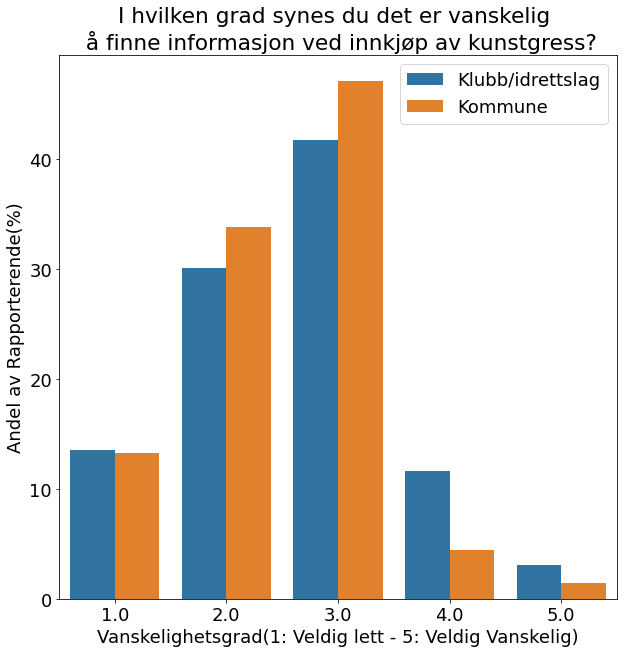

In [33]:
kommune_df = data.loc[data["1.1"] == "Kommune"]
klubb_df = data.loc[data["1.1"] == "Klubb/idrettslag"]

df = kommune_df.append(klubb_df)


x, y, hue = "4.3", "prop", "1.1"
hue_order = ["kommune", "klubb"]

f, ax = plt.subplots(figsize=(10.0, 10.0))

prop_df = (df[x]
 .groupby(df[hue])
 .value_counts(normalize=True).mul(100)
 .rename(y)
 .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df, ax=ax).set(xlabel='Vanskelighetsgrad(1: Veldig lett - 5: Veldig Vanskelig)', ylabel='Andel av Rapporterende(%)')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[:], labels=labels, loc="upper right")

plt.title("I hvilken grad synes du det er vanskelig \n å finne informasjon ved innkjøp av kunstgress?")
plt.savefig("barplot_vansk_info_innkjøp")

# 4.6

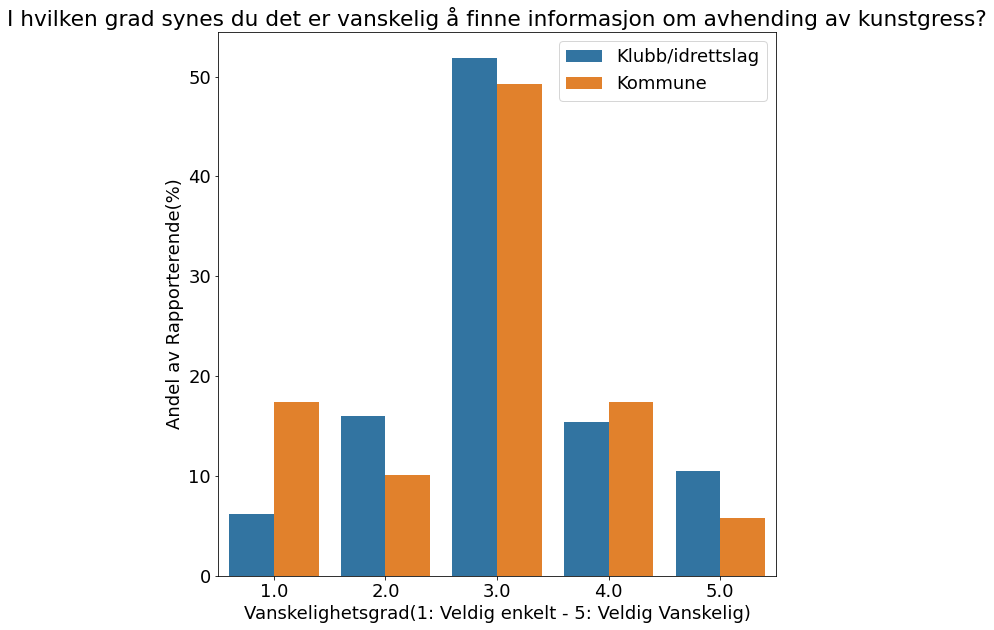

In [34]:
kommune_df = data.loc[data["1.1"] == "Kommune"]
klubb_df = data.loc[data["1.1"] == "Klubb/idrettslag"]

df = kommune_df.append(klubb_df)


x, y, hue = "4.6", "prop", "1.1"
hue_order = ["kommune", "klubb"]

f, ax = plt.subplots(figsize=(10.0, 10.0))

prop_df = (df[x]
 .groupby(df[hue])
 .value_counts(normalize=True).mul(100)
 .rename(y)
 .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df, ax=ax).set(xlabel='Vanskelighetsgrad(1: Veldig enkelt - 5: Veldig Vanskelig)', ylabel='Andel av Rapporterende(%)')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[:], labels=labels, loc="upper right")

plt.title("I hvilken grad synes du det er vanskelig å finne informasjon om avhending av kunstgress?")
plt.savefig("barplot_vansk_info_avhending")

# 4.6

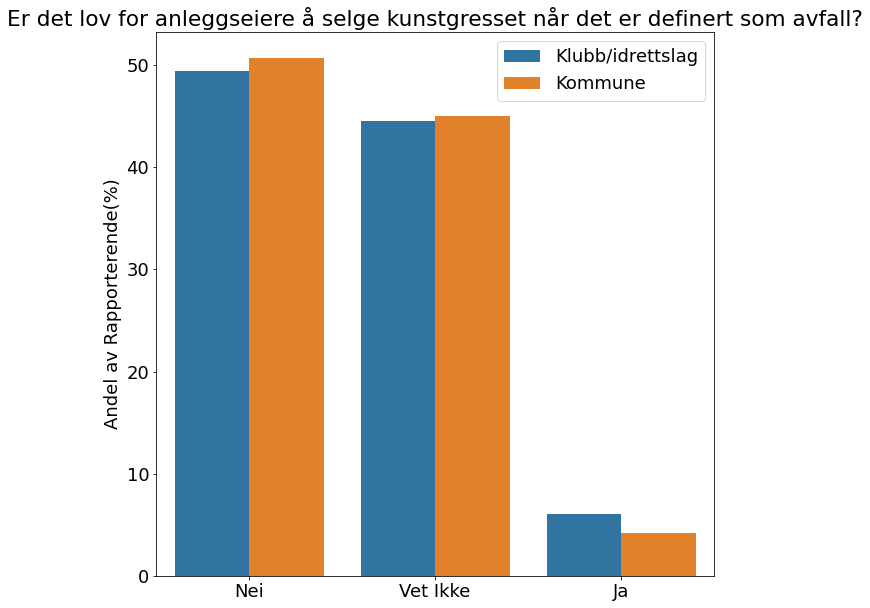

In [37]:
kommune_df = data.loc[data["1.1"] == "Kommune"]
klubb_df = data.loc[data["1.1"] == "Klubb/idrettslag"]

df = kommune_df.append(klubb_df)


x, y, hue = "5.3", "prop", "1.1"
hue_order = ["kommune", "klubb"]

f, ax = plt.subplots(figsize=(10.0, 10.0))

prop_df = (df[x]
 .groupby(df[hue])
 .value_counts(normalize=True).mul(100)
 .rename(y)
 .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df, ax=ax).set(xlabel='', ylabel='Andel av Rapporterende(%)')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[:], labels=labels, loc="upper right")

plt.title("Er det lov for anleggseiere å selge kunstgresset når det er definert som avfall?")
plt.savefig("annleggseiere_selge_avfall_kom_klu")

ValueError: Could not interpret input '5.3'

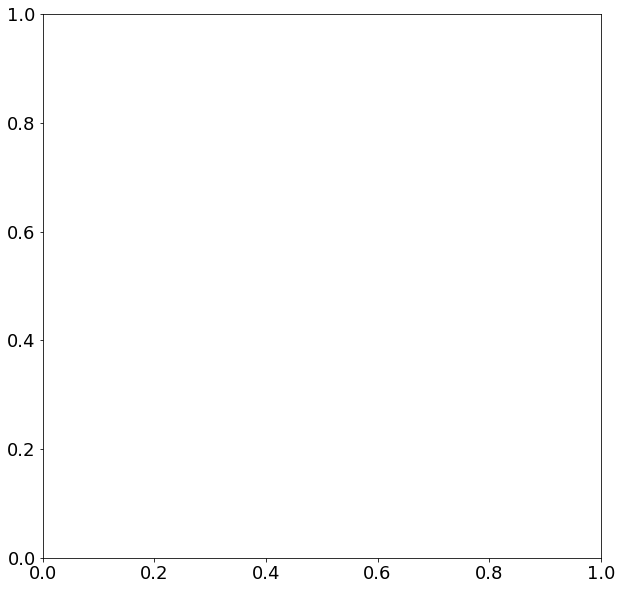

In [40]:
x, y = "5.3", "prop"

f, ax = plt.subplots(figsize=(10.0, 10.0))

prop_df = (data[x]
 .value_counts(normalize=True).mul(100)
 .rename(y)
 .reset_index())

sns.barplot(x=x, y=y, data=prop_df, ax=ax).set(xlabel='', ylabel='Andel av Rapporterende(%)')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[:], labels=labels, loc="upper right")

plt.title("Er det lov for anleggseiere å selge kunstgresset når det er definert som avfall?")
plt.savefig("annleggseiere_selge_avfall")

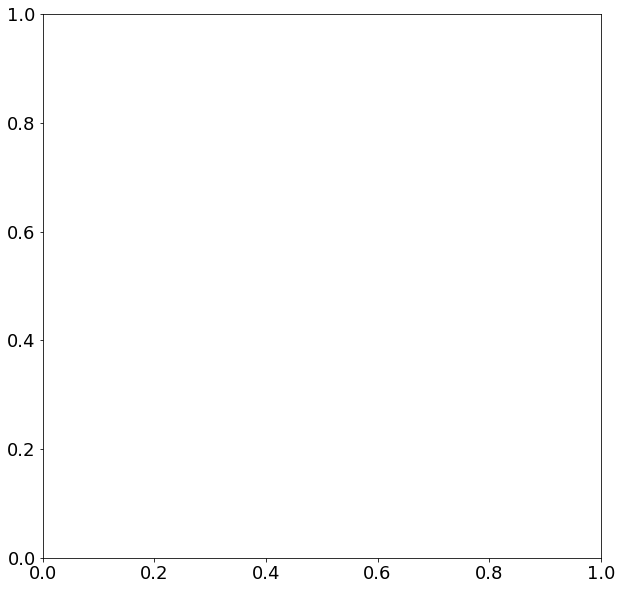

In [41]:
x, y = "5.3", "prop"

f, ax = plt.subplots(figsize=(10.0, 10.0))

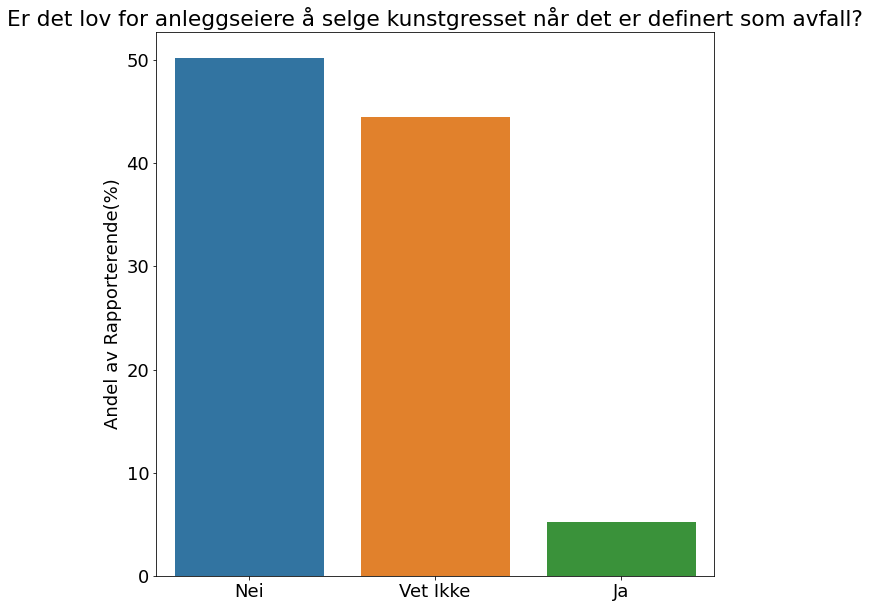

In [61]:
f, ax = plt.subplots(figsize=(10.0, 10.0))
pdf = data["5.3"].value_counts(normalize=True).mul(100).reset_index()

sns.barplot(x='index', y='5.3', data=pdf, ax=ax).set(xlabel='', ylabel='Andel av Rapporterende(%)')

sns

plt.title("Er det lov for anleggseiere å selge kunstgresset når det er definert som avfall?")
plt.savefig("annleggseiere_selge_avfall")

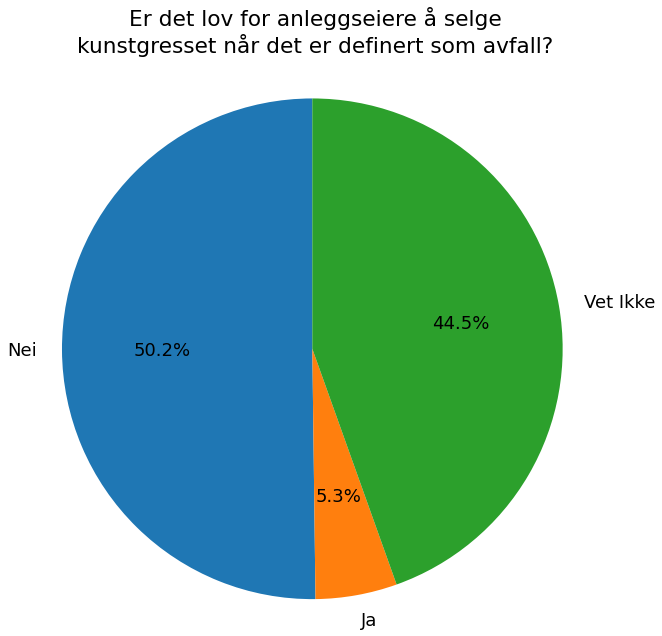

In [83]:
labels = ["Nei", "Ja", "Vet Ikke"]
sizes = [50.202429, 5.263158, 44.534413]
eplode = [0, 0., 0.2]
fig1, ax1 = plt.subplots(figsize=(10.0, 10.0))
ax1.pie(sizes, explode=None, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.title("Er det lov for anleggseiere å selge\nkunstgresset når det er definert som avfall?", pad=25)
plt.savefig("pie_avfall")


In [64]:
pdf

,index,5.3
0,Nei,50.202429
1,Vet Ikke,44.534413
2,Ja,5.263158
